In [1]:
%pip install nibabel huggingface_hub

Note: you may need to restart the kernel to use updated packages.


In [2]:
#nyoba load awal di huggingface
from huggingface_hub import hf_hub_download
import nibabel as nib
import numpy as np

def load_case(index):
    # Download file CCTA dan mask-nya dari HuggingFace
    img_path = hf_hub_download(repo_id="MedHK23/CCA", filename=f"train/images/{index}.nii.gz")
    mask_path = hf_hub_download(repo_id="MedHK23/CCA", filename=f"train/labels/{index}.nii.gz")
    
    # Load data volume dan mask ke array numpy
    img_volume = nib.load(img_path).get_fdata()
    mask_volume = nib.load(mask_path).get_fdata()
    
    return img_volume, mask_volume

/Users/diankartikaputri/Documents/CCTAAAA/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from dotenv import load_dotenv
import os

# Load .env file
load_dotenv()

# Ambil token dari environment
hf_token = os.getenv("HF_TOKEN")

In [4]:
#install dotenv biar bisa ngakses file env (file env itu isinya kek password kita)
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [5]:
#ini make token .env yang udah disimpen tadi
import os
from huggingface_hub import login
from dotenv import load_dotenv

# Install dotenv kalau belum ada
%pip install python-dotenv > /dev/null

# Load isi file .env
load_dotenv()

# Ambil token dari env
hf_token = os.getenv("HF_TOKEN")
login(token=hf_token)

Note: you may need to restart the kernel to use updated packages.


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [6]:
#ini make si token buat akses file si huggingface
from huggingface_hub import list_repo_files, repo_exists
import os
from huggingface_hub import login
from dotenv import load_dotenv

# Install dotenv kalau belum ada
%pip install python-dotenv > /dev/null

# Load isi file .env
load_dotenv()

# Ambil token dari env
hf_token = os.getenv("HF_TOKEN")
login(token=hf_token)

repo_id = "MedHK23/CCA"

if repo_exists(repo_id):
    print(f"Repository '{repo_id}' found.")
    try:
        files = list_repo_files(repo_id)
        print(files[:20])  # tampilkan 20 file pertama
    except Exception as e:
        print(f"An error occurred while listing files: {e}")
else:
    print(f"Repository '{repo_id}' not found. Please check the repository ID or permissions.")

Note: you may need to restart the kernel to use updated packages.


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Repository 'MedHK23/CCA' not found. Please check the repository ID or permissions.


In [7]:
#ini make si token buat akses file si huggingface
from huggingface_hub import list_repo_files, repo_exists
import os
from huggingface_hub import login
from dotenv import load_dotenv

# Install dotenv kalau belum ada
%pip install python-dotenv > /dev/null

# Load isi file .env
load_dotenv()

# Ambil token dari env
hf_token = os.getenv("HF_TOKEN")
login(token=hf_token)

repo_id = "MedHK23/CCA"

if repo_exists(repo_id):
    print(f"Repository '{repo_id}' found.")
    try:
        files = list_repo_files(repo_id)
        print(files[:20])  # tampilkan 20 file pertama
    except Exception as e:
        print(f"An error occurred while listing files: {e}")
else:
    print(f"Repository '{repo_id}' not found. Please check the repository ID or permissions.")

Note: you may need to restart the kernel to use updated packages.


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Repository 'MedHK23/CCA' not found. Please check the repository ID or permissions.


In [8]:
#ini load awal
from huggingface_hub import hf_hub_download, list_repo_files
import nibabel as nib

repo_id = "MedHK23/CCA"

# List files with correct repo_type
try:
    files_in_repo = list_repo_files(repo_id=repo_id, repo_type="dataset")
    print(f"Files found in {repo_id}:", files_in_repo[:2])  # Show first 20 files
except Exception as e:
    print(f"Error listing files in {repo_id}: {e}")
    exit()

# File yang mau dicoba download
img_filename = "train/images/0.nii.gz"

if img_filename in files_in_repo:
    try:
        img_path = hf_hub_download(repo_id=repo_id, filename=img_filename, repo_type="dataset")
        img_volume = nib.load(img_path).get_fdata()
        print("Image Shape:", img_volume.shape)
    except Exception as e:
        print(f"Error downloading or loading image file {img_filename}: {e}")
else:
    print(f"Image file '{img_filename}' not found in the repository.")


Files found in MedHK23/CCA: ['.gitattributes', 'README.md']
Image Shape: (832, 832, 576)


In [9]:
import os
import numpy as np
from huggingface_hub import hf_hub_download
import nibabel as nib
from tqdm import tqdm

repo_id = "MedHK23/CCA"

# Folder untuk menyimpan hasil
os.makedirs("npy/images", exist_ok=True)
os.makedirs("npy/masks", exist_ok=True)

for i in tqdm(range(5)):  # file 0–19
    try:
        # Path filename image dan mask
        img_filename = f"train/images/{i}.nii.gz"
        mask_filename = f"train/labels/{i}.nii.gz"

        # Download
        img_path = hf_hub_download(repo_id=repo_id, filename=img_filename, repo_type="dataset")
        mask_path = hf_hub_download(repo_id=repo_id, filename=mask_filename, repo_type="dataset")

        # Load data
        img = nib.load(img_path).get_fdata()
        mask = nib.load(mask_path).get_fdata()

        # Simpan ke .npy
        np.save(f"npy/images/{i}.npy", img)
        np.save(f"npy/masks/{i}.npy", mask)

    except Exception as e:
        print(f"❌ Error at index {i}: {e}")


 80%|████████  | 4/5 [01:36<00:26, 26.89s/it]

❌ Error at index 3: 398721024 requested and 268435456 written


100%|██████████| 5/5 [01:40<00:00, 20.05s/it]

❌ Error at index 4: 398721024 requested and 0 written


In [10]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load volume dan mask
img = np.load("npy/images/0.npy")
mask = np.load("npy/masks/0.npy")

print("Image shape:", img.shape)
print("Mask shape :", mask.shape)

Image shape: (832, 832, 576)
Mask shape : (832, 832, 576)


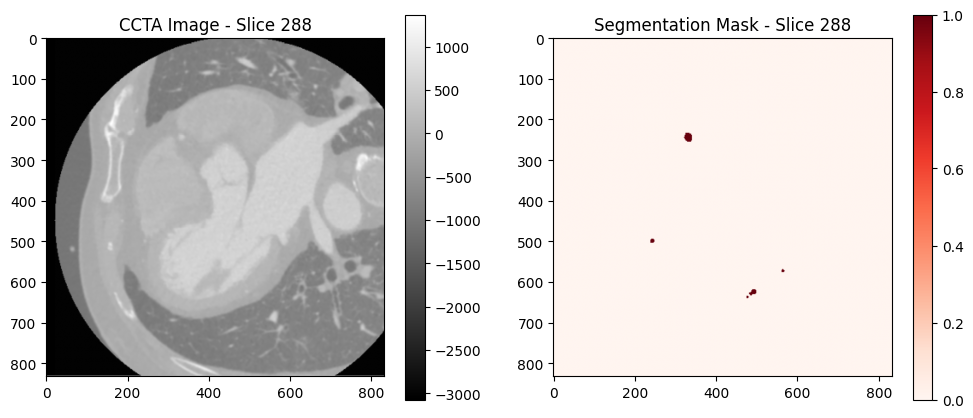

In [ ]:
# Ambil slice tengah berdasarkan sumbu z
z = img.shape[2] // 2

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img[:, :, z], cmap='gray')
plt.title(f"CCTA Image - Slice {z}")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(mask[:, :, z], cmap='Reds')
plt.title(f"Segmentation Mask - Slice {z}")
plt.colorbar()

plt.show()

#berhasil sampai tahap visualisasi slice ke-288 dari dataset index ke-0 (gambar CCTA dan mask segmentasinya).

In [15]:
from datasets import load_dataset

# Pastikan ini sesuai dengan dataset yang kamu pakai sebelumnya
dataset = load_dataset("MedHK23/CCA", split="train")

In [14]:
# Looping dan eksplorasi semua data yang sudah berhasil di-download
# bisa amati mana yang punya plak atau lesi paling jelas dan relevan
for i in range(3):  # Karena index ke-0,1,2
    data = dataset[i]
    image = nib.load(data['image']).get_fdata()
    mask = nib.load(data['label']).get_fdata()

    slice_idx = image.shape[2] // 2  # ambil irisan tengah
    img_slice = image[:, :, slice_idx]
    mask_slice = mask[:, :, slice_idx]

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(img_slice.T, cmap='gray', origin='lower')
    axs[0].set_title(f"CCTA Image - Index {i}, Slice {slice_idx}")
    axs[1].imshow(mask_slice.T, cmap='Reds', origin='lower')
    axs[1].set_title(f"Segmentation Mask - Index {i}, Slice {slice_idx}")
    plt.colorbar(ax=axs[1])
    plt.show()

NameError: name 'dataset' is not defined